In [1]:
#ASE modules
from ase import Atoms
from ase.visualize import view
from ase.io import read,write
from ase.build import molecule
from ase.calculators.vasp import Vasp

#Python modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import physical_constants

In [2]:
def Calc_Encut(direct, en, atom):
    
    calc = Vasp(
            directory = direct,
            encut = en, #planewave cutoff
            xc = 'PBE', #exchange-correlation functional
            atoms = atom,
            )
    
    return calc

In [4]:
atoms = Atoms('CO', 
             positions = [(0,0,0), (1.2,0,0)],
             pbc = [1,1,1],
            )

#view(atoms)

In [14]:
L = [4,5,6,8,10]
energies = []

for a in L:
    atoms.set_cell([a,a,a], scale_atoms = False)
    atoms.center()
    #view(atoms)
    
    calc = Calc_Encut('./lab3_5_012923/co-L-{0}'.format(a), 350, atoms)
    print(calc)
    calc.calculate(atoms)
    calc.read()
    
    energies.append(calc.get_potential_energy())

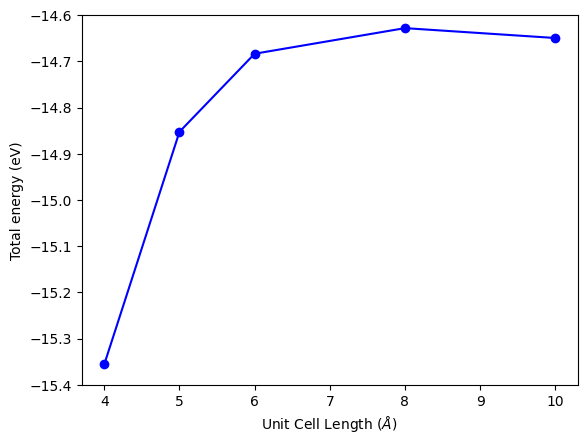

In [19]:
plt.plot(L, energies, 'bo-')
plt.xlabel('Unit Cell Length ($\AA$)')
plt.ylabel('Total energy (eV)')
plt.savefig('./lab3_5_012923/co-e-v.png')
plt.ylim([-15.4, -14.6])
plt.show()